# Importing the dataset

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

# Data collection & Processing

In [25]:
df=pd.read_csv("iriscodsoft.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [26]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
df.shape

(150, 5)

In [28]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [30]:
df.duplicated().any()

True

In [52]:
df=pd.DataFrame(df)

In [54]:
display(df.drop_duplicates())

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [55]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Prep for Modelling

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [57]:
X=df.drop(columns="species")
y=df["species"]
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [58]:
X_train.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,112.000000,112.000000,112.000000,112.000000
mean,5.886607,3.051786,3.796429,1.222321
std,0.871314,0.436196,1.800697,0.782662
min,4.300000,2.000000,1.100000,0.100000
25%,5.100000,2.800000,1.575000,0.300000
50%,5.800000,3.000000,4.250000,1.300000
75%,6.500000,3.300000,5.200000,1.900000
max,7.900000,4.400000,6.900000,2.500000


In [59]:
y_train.describe()

count                112
unique                 3
top       Iris-virginica
freq                  41
Name: species, dtype: object

In [60]:
knn=KNeighborsClassifier(n_neighbors=9)

In [61]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
61,5.9,3.0,4.2,1.5
92,5.8,2.6,4.0,1.2
112,6.8,3.0,5.5,2.1
2,4.7,3.2,1.3,0.2
141,6.9,3.1,5.1,2.3


In [62]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [63]:
knn.score(X_test,y_test)*100

97.36842105263158

In [64]:
prediction_knn=knn.predict(X_test)
print("prediction for test set: {}".format(prediction_knn))

prediction for test set: ['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica']


In [65]:
print("accuracy of the model : {:.2f}".format(accuracy_score(y_test,prediction_knn)*100))

accuracy of the model : 97.37


[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



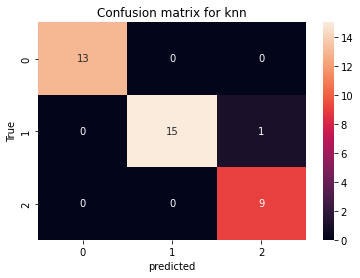

In [66]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
con_mat=confusion_matrix(y_test,prediction_knn)
print(con_mat)
sns.heatmap(con_mat,annot=True, fmt="d")
plt.title("Confusion matrix for knn")
plt.xlabel("predicted")
plt.ylabel("True")
print(classification_report(y_test,prediction_knn))

In [67]:
X_new = np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])
#Prediction of the species from the input vector
prediction = knn.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [68]:
import pickle
with open('knn.pickle', 'wb') as f:
    pickle.dump(knn, f)

In [69]:
with open('knn.pickle', 'rb') as f:
    model = pickle.load(f)

In [70]:
model.predict(X_new)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)